In [1]:
# %tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [16]:
train_labels[1:14]
# 0 	T-shirt/top
# 1 	Trouser
# 2 	Pullover
# 3 	Dress
# 4 	Coat
# 5 	Sandal
# 6 	Shirt
# 7 	Sneaker
# 8 	Bag
# 9 	Ankle boot



array([0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5], dtype=uint8)

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

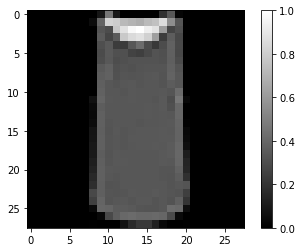

'T-shirt/top'

In [61]:
def showimage(img):
    plt.figure()
    plt.imshow(img,cmap='gray')
    plt.colorbar()
    # plt.grid(True)
    plt.show()

x=2
showimage(train_images[x])
class_names[train_labels[x]]


In [37]:
#data pre processing 
#squish input values between 0 and 1
# nnet starts with random value betweeen 0 and 1 : when huge difference between input range and weights more calc needed
# to attain vals that make sense
#
# DONT FORGET TO PREPROCESS TEST DATA ALSO

train_images = train_images / 255.0  # float
test_images = test_images / 255.0

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)---- input
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)-----10 labels,softmax proba distribution
])

In [40]:
# model defined above

# now optimiser,loss, metrics 


# hyper parameter tuning :::::also activation from above,epochs
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4966 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.8982
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.243

In [42]:
# find accuracy using test data

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8833
Test accuracy: 0.8833000063896179


# notice accuracy on test 88% and on train 90 %
this is an example of overfitting; model saw same data through the 10 epochs , it kinda started memmorising

[1.9376109e-04 2.6654325e-06 8.0519003e-01 8.5007048e-07 1.8458283e-02
 1.5987368e-10 1.7615418e-01 1.9865840e-07 8.1879101e-08 2.8532630e-08]


2
Pullover


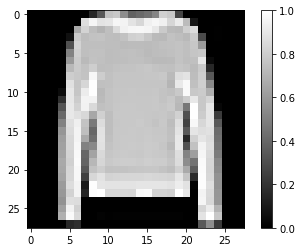

In [72]:
predictions=model.predict(test_images)
# print(*predictions,sep="\n")
x=99
print(predictions[x])
# probablity distribution of that image among the 10 labels
maxval_index=np.argmax(predictions[x])
print("\n")
print(maxval_index)  # returns index of max val
print(class_names[maxval_index])
showimage(test_images[x])


Pick a number: 55


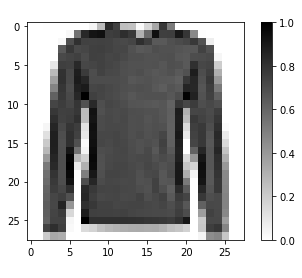

In [75]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
        if 0 <= num <= 1000:
            return int(num)
        else:
            print("Try again...")
%matplotlib inline

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
